In [1]:
import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-v0_8-whitegrid') # https://python-graph-gallery.co|m/199-matplotlib-style-sheets/
    rc('font', family=font_name)
    
# tqdm
from tqdm.notebook import tqdm

## 1. 데이터 로드

In [2]:
train = pd.read_csv('c:/reposit/data/dacon/235743_구내식당 식사 인원 예측 AI 경진대회_data/train.csv')
test = pd.read_csv('c:/reposit/data/dacon/235743_구내식당 식사 인원 예측 AI 경진대회_data/test.csv')

train.shape, test.shape

((1205, 12), (50, 10))

## 2. 데이터 확인

In [3]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [4]:
test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [ ]:
train.isnull().sum().to_frame('nan')

In [7]:
test.isnull().sum().to_frame('nan')

,nan
일자,0
요일,0
본사정원수,0
본사휴가자수,0
본사출장자수,0
본사시간외근무명령서승인건수,0
현본사소속재택근무자수,0
조식메뉴,0
중식메뉴,0
석식메뉴,0


## 3. 데이터 전처리

### 컬럼명 수정

In [8]:
train.columns = ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'brk', 'lun', 'din', 'target_lun', 'target_din']
train.head(1)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,lun,din,target_lun,target_din
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0


In [9]:
test.columns = ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'brk', 'lun', 'din']
test.head(1)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,lun,din
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치


### 날짜와 요일

In [10]:
def to_datetime(df, date):
    df['date'] = pd.to_datetime(df['date'])
    df['dow'] = df['date'].dt.weekday

In [11]:
to_datetime(train, 'date')
to_datetime(test, 'date')

In [12]:
train.head(1)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,lun,din,target_lun,target_din
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0


In [13]:
test.head(1)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,lun,din
0,2021-01-27,2,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1205 non-null   datetime64[ns]
 1   dow         1205 non-null   int64         
 2   employees   1205 non-null   int64         
 3   dayoff      1205 non-null   int64         
 4   bustrip     1205 non-null   int64         
 5   ovtime      1205 non-null   int64         
 6   remote      1205 non-null   float64       
 7   brk         1205 non-null   object        
 8   lun         1205 non-null   object        
 9   din         1205 non-null   object        
 10  target_lun  1205 non-null   float64       
 11  target_din  1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 113.1+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       50 non-null     datetime64[ns]
 1   dow        50 non-null     int64         
 2   employees  50 non-null     int64         
 3   dayoff     50 non-null     int64         
 4   bustrip    50 non-null     int64         
 5   ovtime     50 non-null     int64         
 6   remote     50 non-null     float64       
 7   brk        50 non-null     object        
 8   lun        50 non-null     object        
 9   din        50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 4.0+ KB


### 메뉴명

In [16]:
res = []

for i in tqdm(range(len(train))):
    
    tmp = train.iloc[i, 8].split(' ')
    tmp = ' '.join(tmp).split()
    
    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    res.append(tmp)

res[:5]

  0%|          | 0/1205 [00:00<?, ?it/s]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치']]

In [17]:
res[-5:]

[['쌀밥/흑미밥/찰현미밥',
  '아욱국',
  '수제함박스테이크',
  '견과류마카로니범벅',
  '생깻잎지',
  '단호박물김치',
  '양상추샐러드*오리엔탈D'],
 ['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯숙회*초장', '무생채', '양상추샐러드*파인D'],
 ['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해초무침', '포기김치', '양상추샐러드*자몽D'],
 ['쌀밥/흑미밥/찰현미밥',
  '전주식콩나물해장국',
  '돈육간장불고기',
  '깐풍연근',
  '연두부*달래양념장',
  '봄동겉절이/양념김',
  '양상추샐러드*오렌지D'],
 ['쌀밥/귀리밥/찰현미밥',
  '들깨미역국',
  '교촌간장치킨',
  '옥수수콘치즈구이',
  '가지고추장무침',
  '포기김치/요구르트',
  '양배추샐러드*사우전D']]

In [20]:
max([len(x) for x in res]), min([len(x) for x in res])

(8, 5)

## 4. 간단한 시각화

### 점심 및 저녁 이용자 수

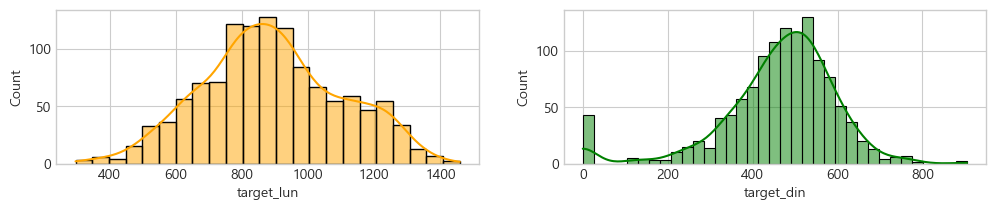

In [45]:
plt.figure(figsize=(12, 2))

plt.subplot(121)
sns.histplot(data=train, x='target_lun', color='orange', kde=True)

plt.subplot(122)
sns.histplot(data=train, x='target_din', color='green', kde=True)

plt.show()

### 시계열

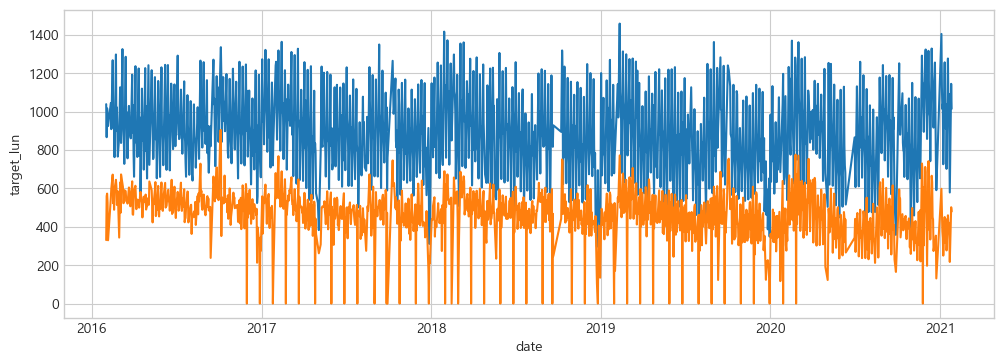

In [59]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=train, x='date', y='target_lun')
sns.lineplot(data=train, x='date', y='target_din')

plt.show()

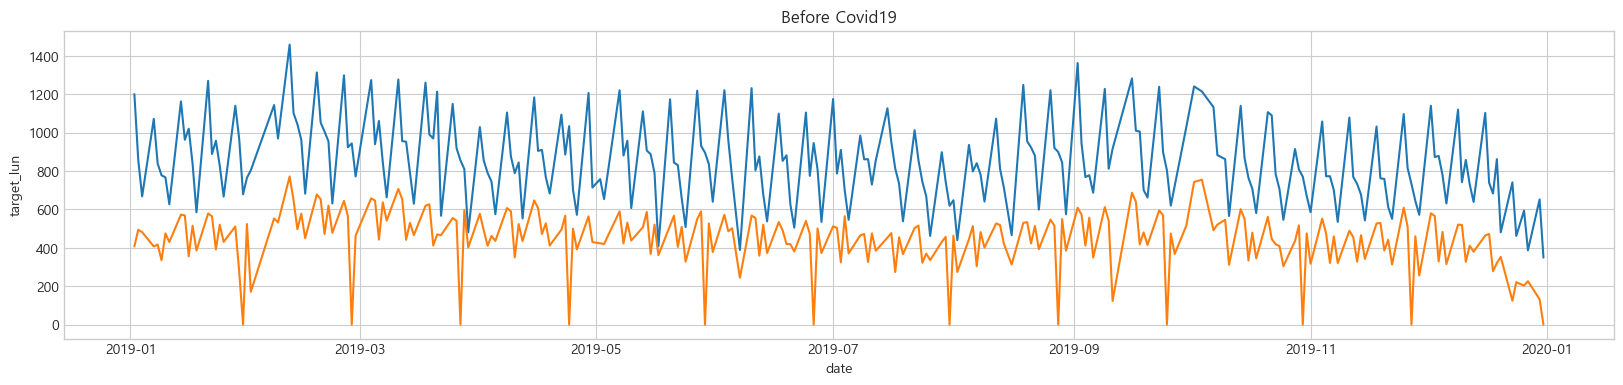

In [65]:
# 코로나 이전
before_covid = train.loc[train['date'].dt.year==2019, ['date', 'target_lun', 'target_din']]

plt.figure(figsize=(20, 4))
sns.lineplot(data=before_covid, x='date', y='target_lun')
sns.lineplot(data=before_covid, x='date', y='target_din')
plt.title('Before Covid19')
plt.show()

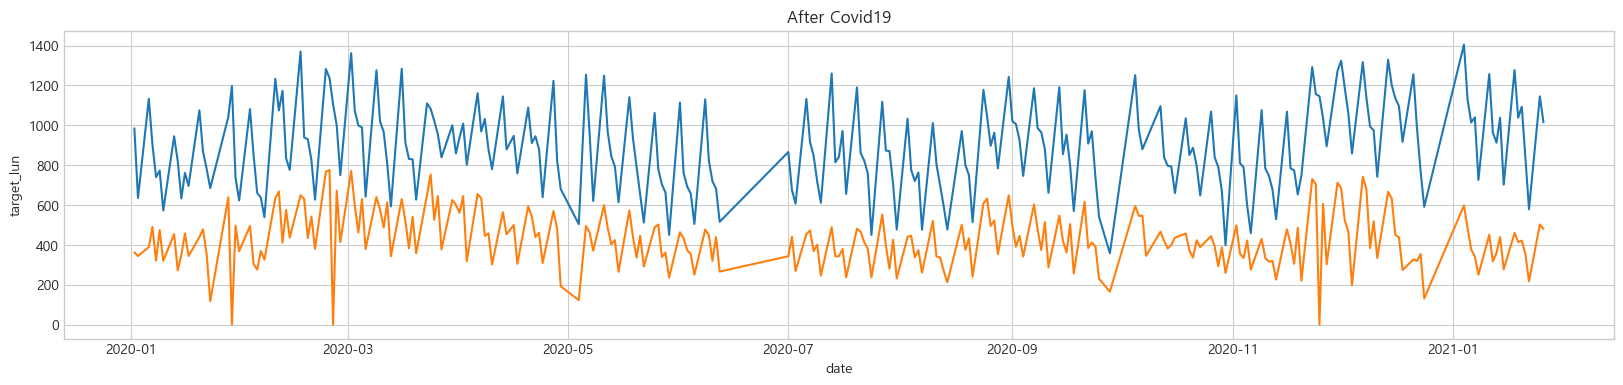

In [67]:
# 코로나 이후
after_covid = train.loc[train['date'].dt.year>=2020, ['date', 'target_lun', 'target_din']]

plt.figure(figsize=(20, 4))
sns.lineplot(data=after_covid, x='date', y='target_lun')
sns.lineplot(data=after_covid, x='date', y='target_din')
plt.title('After Covid19')
plt.show()

In [82]:
# 코로나 전후 점심과 저녁 이용자수 평균
a = round(before_covid.target_lun.mean(), 2)
b = round(before_covid.target_din.mean(), 2)
c = round(after_covid.target_lun.mean(), 2)
d = round(after_covid.target_din.mean(), 2)

In [83]:
print('코로나 이전 점심 이용자수 평균: {} \n코로나 이전 저녁 이용자수 평균: {} \n\n코로나 이후 점심 이용자수 평균: {} \n코로나 이후 저녁 이용자수 평균: {}'.format(a, b, c, d))

코로나 이전 점심 이용자수 평균: 850.51 
코로나 이전 저녁 이용자수 평균: 445.39 

코로나 이후 점심 이용자수 평균: 890.97 
코로나 이후 저녁 이용자수 평균: 428.34


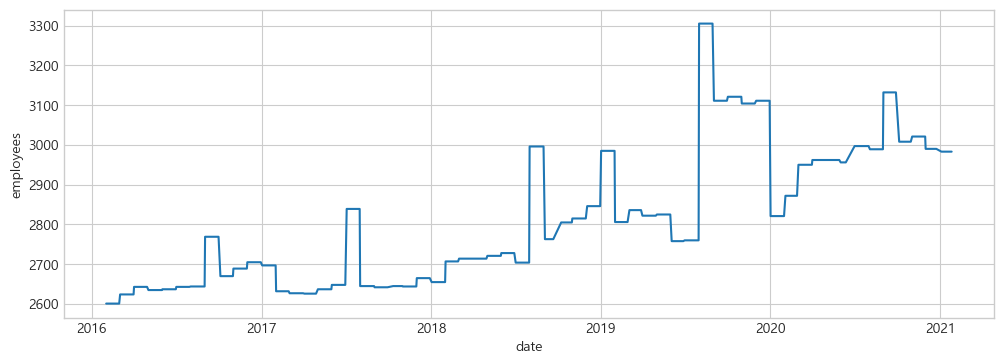

In [84]:
# 직원 수 확인
plt.figure(figsize=(12, 4))
sns.lineplot(data=train, x='date', y='employees')
plt.show()

In [86]:
train.loc[train.target_din==0, ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'din', 'target_din']]

,date,dow,employees,dayoff,bustrip,ovtime,remote,din,target_din
204,2016-11-30,2,2689,68,207,0,0.0,*,0.0
224,2016-12-28,2,2705,166,225,0,0.0,*,0.0
244,2017-01-25,2,2697,79,203,0,0.0,*,0.0
262,2017-02-22,2,2632,75,252,0,0.0,*,0.0
281,2017-03-22,2,2627,53,235,0,0.0,*,0.0
306,2017-04-26,2,2626,45,304,0,0.0,*,0.0
327,2017-05-31,2,2637,43,265,0,0.0,자기계발의날,0.0
346,2017-06-28,2,2648,58,259,0,0.0,*자기계발의날*,0.0
366,2017-07-26,2,2839,254,246,0,0.0,가정의날,0.0
392,2017-09-01,4,2642,177,303,45,0.0,*,0.0


### 상관관계

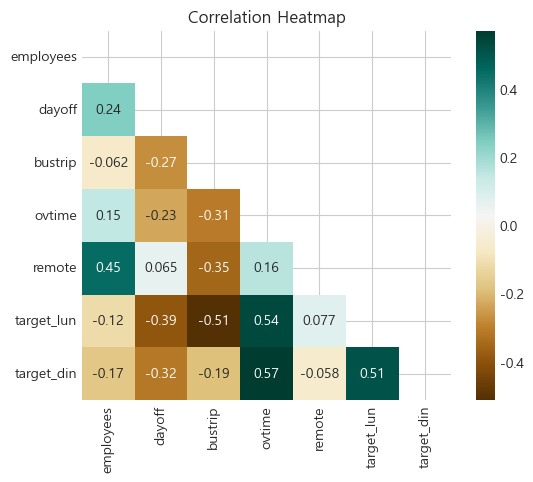

In [99]:
df_corr = train[['employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'target_lun', 'target_din']]
mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool_))

sns.heatmap(df_corr.corr(), annot=True, cmap='BrBG', square=True, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

In [103]:
train[features]

,employees,dayoff,bustrip,ovtime,employees,dayoff,bustrip,ovtime
0,2601,50,150,238,2601,50,150,238
1,2601,50,173,319,2601,50,173,319
2,2601,56,180,111,2601,56,180,111
3,2601,104,220,355,2601,104,220,355
4,2601,278,181,34,2601,278,181,34
...,...,...,...,...,...,...,...,...
1200,2983,75,198,4,2983,75,198,4
1201,2983,92,231,462,2983,92,231,462
1202,2983,255,248,1,2983,255,248,1
1203,2983,107,153,616,2983,107,153,616


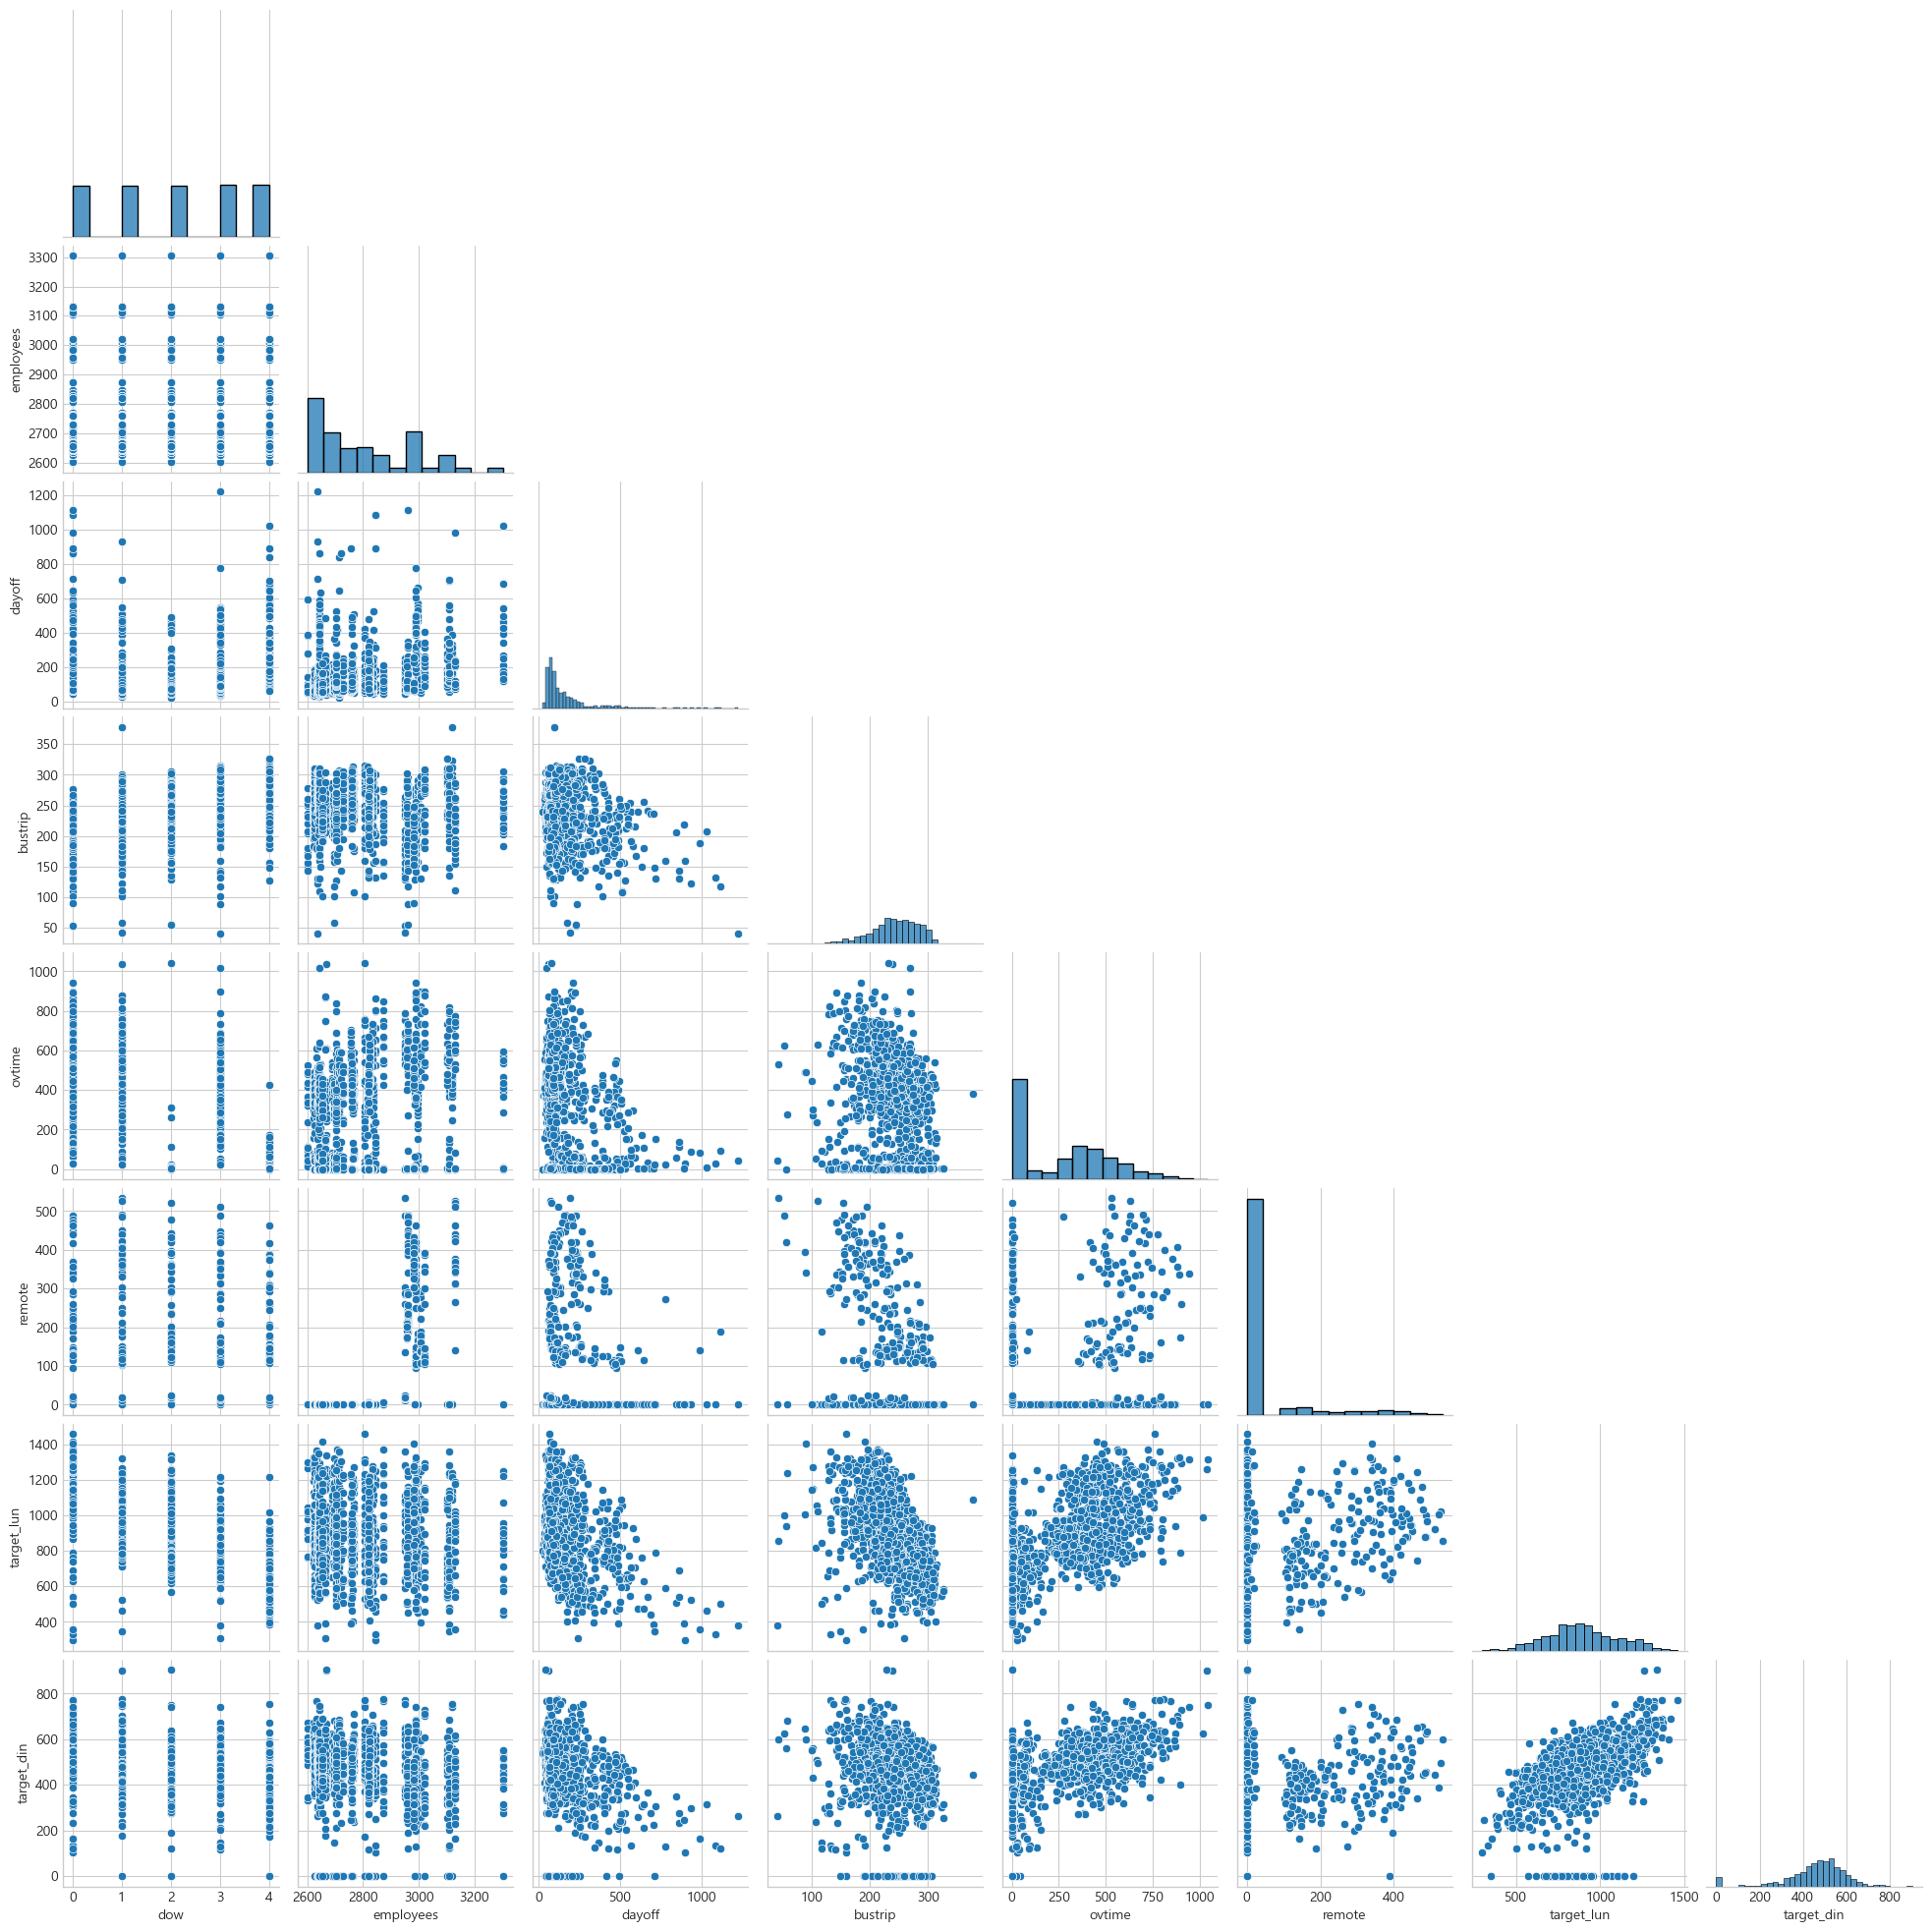

In [108]:
sns.pairplot(data=train, corner=True)
plt.show()

### 월별 요일별 패턴

In [112]:
tmp = train[['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'target_lun', 'target_din']]
tmp['month'] = tmp['date'].dt.month
tmp.head(3)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_2968\4146188994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['month'] = tmp['date'].dt.month


,date,dow,employees,dayoff,bustrip,ovtime,remote,target_lun,target_din,month
0,2016-02-01,0,2601,50,150,238,0.0,1039.0,331.0,2
1,2016-02-02,1,2601,50,173,319,0.0,867.0,560.0,2
2,2016-02-03,2,2601,56,180,111,0.0,1017.0,573.0,2


In [113]:
tmp.tail(3)

,date,dow,employees,dayoff,bustrip,ovtime,remote,target_lun,target_din,month
1202,2021-01-22,4,2983,255,248,1,303.0,579.0,217.0,1
1203,2021-01-25,0,2983,107,153,616,327.0,1145.0,502.0,1
1204,2021-01-26,1,2983,69,183,551,362.0,1015.0,480.0,1


In [119]:
tmp_lun = tmp.groupby(['dow', 'month'])['target_lun'].mean().reset_index().pivot_table(values='target_lun', index='dow', columns='month')
tmp_din = tmp.groupby(['dow', 'month'])['target_din'].mean().reset_index().pivot_table(values='target_din', index='dow', columns='month')

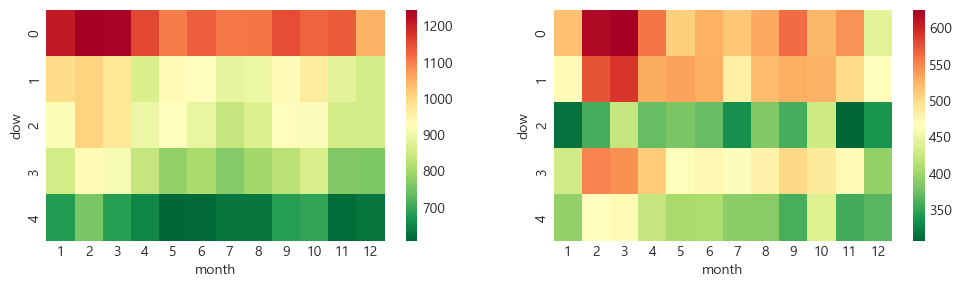

In [122]:
plt.figure(figsize=(12, 3))

plt.subplot(121)
sns.heatmap(tmp_lun, cmap='RdYlGn_r')

plt.subplot(122)
sns.heatmap(tmp_din, cmap='RdYlGn_r')

plt.show()

In [127]:
idx_drop = train[train.target_din==0].index
tmp = train.drop(idx_drop)

tmp['month'] = tmp['date'].dt.strftime('%m')

tmp_din2 = tmp.groupby(['dow', 'month'])['target_din'].mean().reset_index().pivot_table(values='target_din', index='dow', columns='month')
tmp_din2

month,01,02,03,04,05,06,07,08,09,10,11,12
dow,,,,,,,,,,,,
0,517.736842,618.684211,625.380952,557.363636,508.052632,527.470588,513.434783,531.100000,562.450000,524.105263,542.523810,442.500000
1,469.318182,575.222222,591.809524,530.809524,535.842105,529.352941,482.045455,521.047619,528.842105,526.210526,500.428571,489.210526
2,388.941176,495.846154,492.833333,440.875000,444.777778,450.285714,387.842105,424.150000,429.266667,506.937500,397.823529,402.875000
3,429.142857,549.631579,544.090909,509.950000,468.142857,474.210526,463.190476,479.636364,501.388889,488.388889,472.545455,393.428571
4,394.166667,467.578947,471.954545,422.047619,404.421053,407.600000,390.590909,389.363636,401.117647,438.411765,356.272727,365.000000


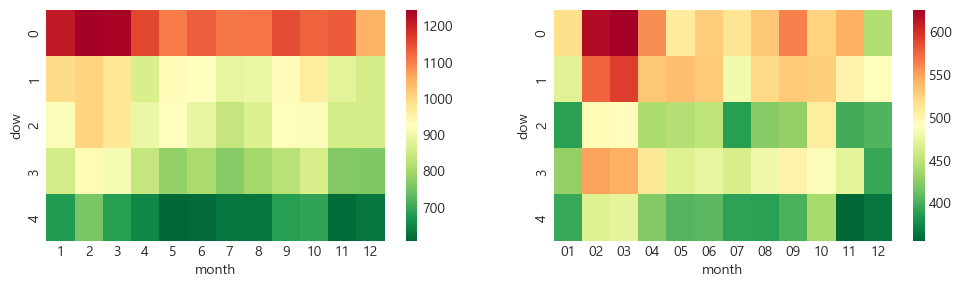

In [128]:
plt.figure(figsize=(12, 3))

plt.subplot(121)
sns.heatmap(tmp_lun, cmap='RdYlGn_r')

plt.subplot(122)
sns.heatmap(tmp_din2, cmap='RdYlGn_r')

plt.show()

In [138]:
covid_before = train.loc[train['date'].dt.year<2020, :]
covid_after = train.loc[train['date'].dt.year>=2020, :]

# 코로나 전 재택근무자 수
covid_before['remote'].value_counts()

0.0    956
Name: remote, dtype: int64

In [141]:
covid_after.describe()

,dow,employees,dayoff,bustrip,ovtime,remote,target_lun,target_din
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1.987952,2973.144578,181.983936,215.839357,351.718876,210.542169,890.967871,428.341365
std,1.409879,72.063223,145.450440,49.681062,308.679003,152.861995,221.513541,140.793775
min,0.000000,2821.000000,47.000000,43.000000,0.000000,0.000000,358.000000,0.000000
25%,1.000000,2956.000000,90.000000,183.000000,2.000000,111.000000,740.000000,341.000000
50%,2.000000,2983.000000,126.000000,221.000000,448.000000,183.000000,879.000000,424.000000
75%,3.000000,2997.000000,229.000000,250.000000,616.000000,342.000000,1046.000000,502.000000
max,4.000000,3132.000000,1113.000000,308.000000,941.000000,533.000000,1405.000000,776.000000


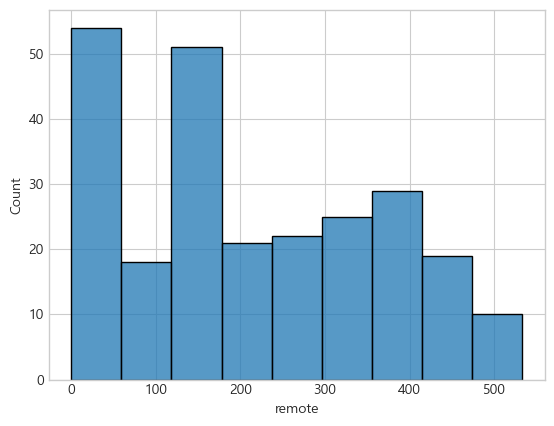

In [140]:
sns.histplot(data=covid_after, x='remote')
plt.show()

In [142]:
def make_pivot(df, col):
    df['month'] = df['date'].dt.month
    
    tmp = df.groupby(['dow', 'month'])[col].mean().reset_index().pivot_table(values=col, index='dow', columns='month')
    
    return tmp

In [143]:
make_pivot(train, 'dayoff')

month,1,2,3,4,5,6,7,8,9,10,11,12
dow,,,,,,,,,,,,
0,106.105263,125.578947,98.761905,132.090909,217.315789,138.705882,197.782609,343.600000,181.800000,149.631579,138.238095,263.05000
1,89.772727,73.333333,64.952381,78.904762,114.473684,76.294118,149.227273,307.428571,101.526316,85.789474,92.142857,177.00000
2,79.380952,90.888889,61.000000,80.052632,73.809524,69.588235,145.363636,311.909091,92.944444,89.052632,93.136364,143.00000
3,128.619048,118.263158,68.500000,90.850000,134.571429,84.473684,149.000000,333.454545,95.888889,105.833333,117.909091,196.47619
4,212.111111,193.368421,187.409091,189.142857,185.842105,223.800000,270.227273,469.181818,190.684211,228.294118,246.909091,307.00000


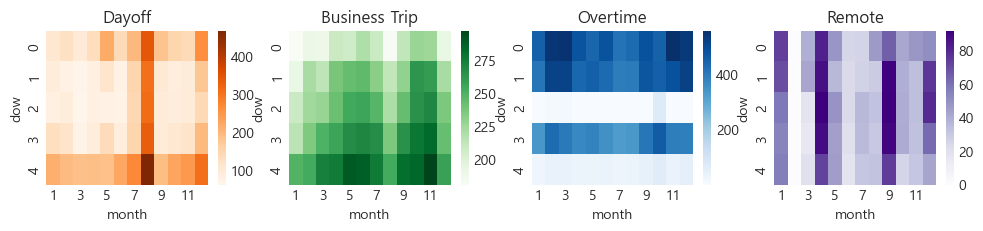

In [150]:
plt.figure(figsize=(12, 2))

plt.subplot(141)
sns.heatmap(make_pivot(train, 'dayoff'), cmap='Oranges')
plt.title('Dayoff')

plt.subplot(142)
sns.heatmap(make_pivot(train, 'bustrip'), cmap='Greens')
plt.title('Business Trip')

plt.subplot(143)
sns.heatmap(make_pivot(train, 'ovtime'), cmap='Blues')
plt.title('Overtime')

plt.subplot(144)
sns.heatmap(make_pivot(train, 'remote'), cmap='Purples')
plt.title('Remote')

plt.show()

In [152]:
df = train[['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'target_lun', 'target_din']]
df['in_office'] = df['employees'] - (df['dayoff'] + df['bustrip'] + df['remote'])
df['month'] = df['date'].dt.strftime("%m")
df.head(3)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_2968\1506071592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_office'] = df['employees'] - (df['dayoff'] + df['bustrip'] + df['remote'])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_2968\1506071592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.strftime("%m")


,date,dow,employees,dayoff,bustrip,ovtime,remote,target_lun,target_din,in_office,month
0,2016-02-01,0,2601,50,150,238,0.0,1039.0,331.0,2401.0,02
1,2016-02-02,1,2601,50,173,319,0.0,867.0,560.0,2378.0,02
2,2016-02-03,2,2601,56,180,111,0.0,1017.0,573.0,2365.0,02


In [ ]:
make_pivot(df, 'in_office')

sns.heatmap(make_pivot(df, 'in_office'), cmap='YlGnBu')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_2968\1878560383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
C:\Users\Playdata\AppData\Local\Temp\ipykernel_2968\1878560383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
